In [2]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(".."))

from sqlalchemy import create_engine
from database.connexion import get_connection

1. Connexion à la base de données

In [3]:
# === 1. Connexion à la base de données ===
sys.path.append(os.path.abspath(".."))

try:
    conn = get_connection()

    # 🔧 Forcer la conversion en str pour SQLAlchemy
    user = conn.user.decode() if isinstance(conn.user, bytes) else conn.user
    password = conn.password.decode() if isinstance(conn.password, bytes) else conn.password
    host = conn.host.decode() if isinstance(conn.host, bytes) else conn.host
    db = conn.db.decode() if isinstance(conn.db, bytes) else conn.db
    port = conn.port

    engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{db}")
    print("✅ Connexion réussie à la base de données MySQL via SQLAlchemy !")

except Exception as e:
    print(f"❌ Erreur de connexion à la base de données : {e}")
    raise SystemExit

✅ Connexion réussie à la base de données MySQL !
✅ Connexion réussie à la base de données MySQL via SQLAlchemy !


2. Chargement des données

In [4]:
# === 2. Chargement des données ===
try:
    athletes_df = pd.read_sql("SELECT * FROM athletes", engine)
    print(f"✅ Données Athlètes chargées ({len(athletes_df)} lignes)")
except Exception as e:
    print(f"❌ Erreur lors du chargement des données : {e}")
    raise SystemExit

✅ Données Athlètes chargées (86928 lignes)



🔍 Aperçu des données :
      id                                        athlete_url  \
0  33361  https://olympics.com/en/athletes/cooper-woods-...   
1  33362          https://olympics.com/en/athletes/elofsson   
2  33363     https://olympics.com/en/athletes/dylan-walczyk   
3  33364     https://olympics.com/en/athletes/olli-penttala   
4  33365          https://olympics.com/en/athletes/reikherd   

        athlete_full_name  games_participations        first_game  \
0  Cooper WOODS-TOPALOVIC                     1      Beijing 2022   
1          Felix ELOFSSON                     2  PyeongChang 2018   
2           Dylan WALCZYK                     1      Beijing 2022   
3           Olli PENTTALA                     1      Beijing 2022   
4        Dmitriy REIKHERD                     1      Beijing 2022   

   athlete_year_birth athlete_medals   bio  
0              2000.0           None  None  
1              1995.0           None  None  
2              1993.0           None  None  
3 

C:\Users\kazad\AppData\Local\Temp\ipykernel_21252\2017418356.py:28: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\kazad\OneDrive\Desktop\Olympics\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


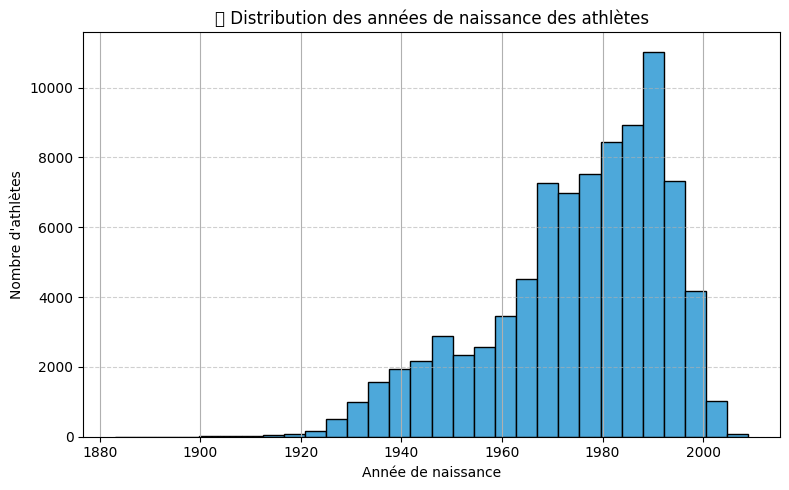

C:\Users\kazad\AppData\Local\Temp\ipykernel_21252\2017418356.py:42: UserWarning: Glyph 128118 (\N{BABY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\kazad\OneDrive\Desktop\Olympics\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128118 (\N{BABY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


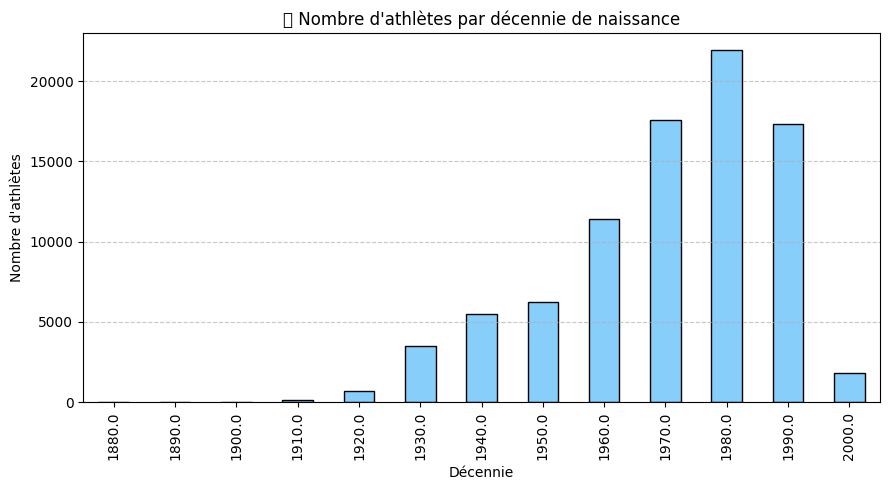


🏅 Top 10 des athlètes les plus médaillés :


C:\Users\kazad\AppData\Local\Temp\ipykernel_21252\2017418356.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_medals["athlete_medals_clean"] = top_medals["athlete_medals"].astype(str).str.extract(r"(\d+)").fillna(0).astype(int)


,athlete_full_name,athlete_medals,games_participations
11547,Michael PHELPS,\n\n\n23\n\nG\n\n\n\n3\n\nS\n\n\n\n2\n\nB\n\n,5
41547,Michael PHELPS,\n\n\n23\n\nG\n\n\n\n3\n\nS\n\n\n\n2\n\nB\n\n,5
78764,Mark SPITZ,\n\n\n9\n\nG\n\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n,2
61448,Carl LEWIS,\n\n\n9\n\nG\n\n\n\n1\n\nS\n\n,4
83585,Larisa LATYNINA,\n\n\n9\n\nG\n\n\n\n5\n\nS\n\n\n\n4\n\nB\n\n,3
8934,Usain BOLT,\n\n\n8\n\nG\n\n,4
38934,Usain BOLT,\n\n\n8\n\nG\n\n,4
8112,Marit BJOERGEN,\n\n\n8\n\nG\n\n\n\n4\n\nS\n\n\n\n3\n\nB\n\n,5
38112,Marit BJOERGEN,\n\n\n8\n\nG\n\n\n\n4\n\nS\n\n\n\n3\n\nB\n\n,5
28840,Björn DAEHLIE,\n\n\n8\n\nG\n\n\n\n4\n\nS\n\n,3


C:\Users\kazad\AppData\Local\Temp\ipykernel_21252\2017418356.py:63: UserWarning: Glyph 127941 (\N{SPORTS MEDAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\kazad\OneDrive\Desktop\Olympics\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127941 (\N{SPORTS MEDAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


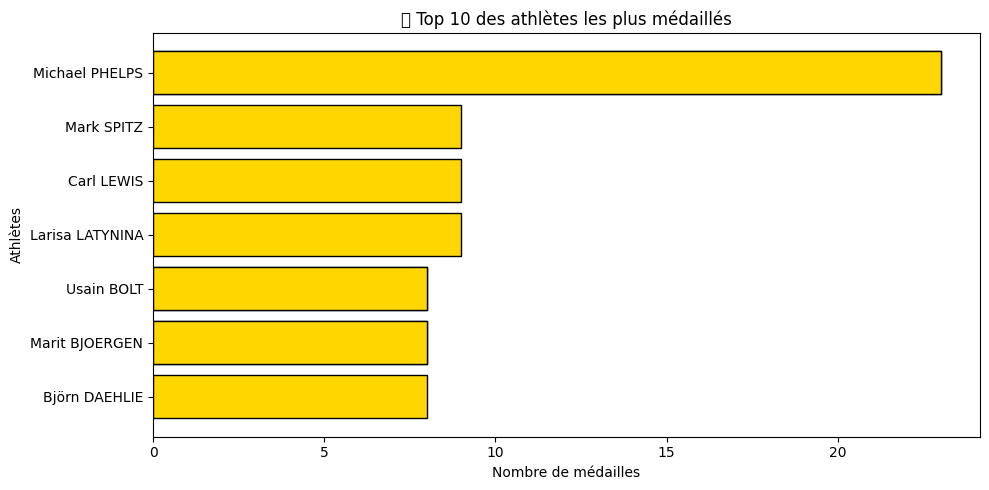


📈 Participation moyenne : 1.63 Jeux par athlète

✅ Analyse des athlètes terminée avec succès !


In [5]:
# === 3. Exploration initiale ===
print("\n🔍 Aperçu des données :")
print(athletes_df.head())

print("\nℹ️ Informations générales :")
print(athletes_df.info())

# === 4. Valeurs manquantes ===
print("\n🚨 Valeurs manquantes par colonne :")
missing = athletes_df.isnull().sum()
print(missing[missing > 0])

# === 5. Statistiques descriptives ===
print("\n📊 Quelques statistiques numériques :")
# print(athletes_df.describe(include='all', datetime_is_numeric=True))

# === 6. Nettoyage basique ===
athletes_df = athletes_df.dropna(subset=["athlete_full_name"])
athletes_df["athlete_year_birth"] = pd.to_numeric(athletes_df["athlete_year_birth"], errors="coerce")

# === 7. Distribution des années de naissance ===
plt.figure(figsize=(8, 5))
athletes_df["athlete_year_birth"].dropna().astype(int).hist(bins=30, color="#4DA8DA", edgecolor="black")
plt.title("📆 Distribution des années de naissance des athlètes")
plt.xlabel("Année de naissance")
plt.ylabel("Nombre d'athlètes")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# === 8. Répartition par décennie de naissance ===
athletes_df = athletes_df.dropna(subset=["athlete_year_birth"])
athletes_df["decade_birth"] = (athletes_df["athlete_year_birth"] // 10) * 10
decade_counts = athletes_df["decade_birth"].value_counts().sort_index()

plt.figure(figsize=(9, 5))
decade_counts.plot(kind="bar", color="#87CEFA", edgecolor="black")
plt.title("👶 Nombre d'athlètes par décennie de naissance")
plt.xlabel("Décennie")
plt.ylabel("Nombre d'athlètes")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# === 9. Top 10 des athlètes les plus médaillés ===
if "athlete_medals" in athletes_df.columns:
    top_medals = athletes_df[athletes_df["athlete_medals"].notnull()]
    
    # Nettoyage du champ si c’est du texte sale (ex: "\n\n\n1\n\nG\n\n")
    top_medals["athlete_medals_clean"] = top_medals["athlete_medals"].astype(str).str.extract(r"(\d+)").fillna(0).astype(int)
    
    top_10 = top_medals.sort_values("athlete_medals_clean", ascending=False).head(10)
    print("\n🏅 Top 10 des athlètes les plus médaillés :")
    display(top_10[["athlete_full_name", "athlete_medals", "games_participations"]])
    
    # Visualisation rapide
    plt.figure(figsize=(10, 5))
    plt.barh(top_10["athlete_full_name"], top_10["athlete_medals_clean"], color="#FFD700", edgecolor="black")
    plt.title("🏅 Top 10 des athlètes les plus médaillés")
    plt.xlabel("Nombre de médailles")
    plt.ylabel("Athlètes")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# === 10. Moyenne de participations ===
if "games_participations" in athletes_df.columns:
    athletes_df["games_participations"] = pd.to_numeric(athletes_df["games_participations"], errors="coerce")
    avg_participation = athletes_df["games_participations"].mean()
    print(f"\n📈 Participation moyenne : {avg_participation:.2f} Jeux par athlète")

print("\n✅ Analyse des athlètes terminée avec succès !")
